In [1]:
#Analisis de los origenes,destinos,notificantes,relacionados, productos y contaminantes
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import itertools
import numpy as np
import matplotlib

In [4]:
data = pd.read_csv('C:/Users/shiny/OneDrive/Desktop/RASFF 2021-2024.csv', sep=';', 
                   header=0, index_col = 0)

In [5]:
origenes = []
destinos = []
relacionados = []
notificantes = []
contaminantes = []
productos = []

for index, row in data.iterrows():
    
    # Check if the value is a string before applying .split()
    origen = row['ORIG_COUNTRY'].split(",") if isinstance(row['ORIG_COUNTRY'], str) else []
    destino = row['DESTIN_COUNTRY'].split(",") if isinstance(row['DESTIN_COUNTRY'], str) else []
    relacionado = row['CONCERN_COUNTRY'].split(",") if isinstance(row['CONCERN_COUNTRY'], str) else []
    notificante = row['NOT_COUNTRY'].split(",") if isinstance(row['NOT_COUNTRY'], str) else []
    contaminante = row['HAZARDS_CAT'].split(",") if isinstance(row['HAZARDS_CAT'], str) else []
    producto = row['PROD_CAT'].split(",") if isinstance(row['PROD_CAT'], str) else []
    
    # Add to respective lists
    for o in origen:
        origenes.append(o.strip())  # strip() to remove any leading/trailing spaces
        
    for d in destino:
        destinos.append(d.strip())
        
    for r in relacionado:
        relacionados.append(r.strip())
        
    for n in notificante:
        notificantes.append(n.strip())
        
    for c in contaminante:
        contaminantes.append(c.strip())
        
    for p in producto:
        productos.append(p.strip())

In [6]:
count = Counter(origenes)
table = pd.DataFrame(list(count.items()), columns=['Country', 'Occurrences'])
table[2] = table['Occurrences']/2997*100
table = table.sort_values(by=['Occurrences'], ascending = False)
table = table.iloc[:50]
table

,Country,Occurrences,2
6,Poland,150,5.005005
10,Turkey,126,4.204204
8,Netherlands,104,3.470137
18,China,90,3.003003
20,France,88,2.936270
0,India,71,2.369036
22,Spain,64,2.135469
9,Egypt,62,2.068735
23,Ukraine,59,1.968635
34,Germany,57,1.901902


In [7]:
variance = table['Occurrences'].diff()/2997*100
print(variance.to_string(index=False))

      NaN
-0.800801
-0.734067
-0.467134
-0.066733
-0.567234
-0.233567
-0.066733
-0.100100
-0.066733
-0.133467
-0.500501
-0.100100
-0.200200
-0.033367
-0.066733
-0.066733
-0.066733
-0.133467
 0.000000
-0.066733
-0.033367
 0.000000
-0.033367
-0.033367
 0.000000
-0.066733
 0.000000
-0.066733
 0.000000
 0.000000
 0.000000
 0.000000
 0.000000
-0.033367
 0.000000
 0.000000
 0.000000
-0.033367
 0.000000
 0.000000
-0.033367
 0.000000
 0.000000
 0.000000
 0.000000
 0.000000
-0.033367
 0.000000
 0.000000


Text(0, 0.5, 'Number of alerts')

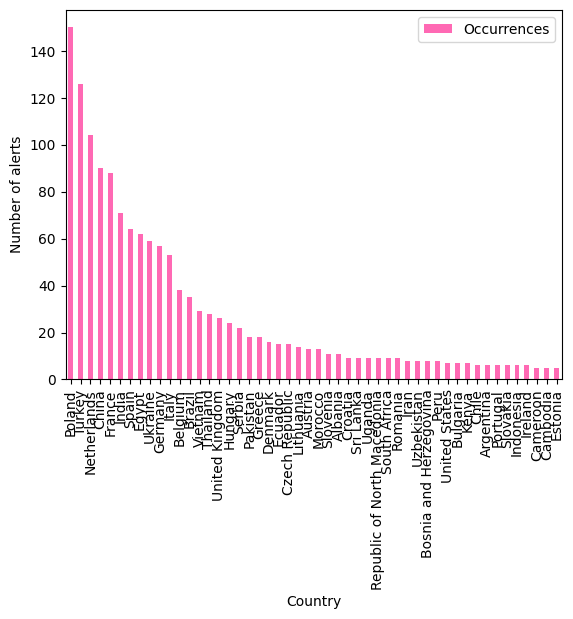

In [8]:
ax = table.plot.bar(x='Country', y='Occurrences', color='hotpink')
plt.xlabel('Country')
plt.ylabel('Number of alerts')

In [17]:
count = Counter(destinos)
table = pd.DataFrame(list(count.items()), columns=['Country', 'Occurrences'])
table[2] = table['Occurrences']/2997*100
table = table.sort_values(by=['Occurrences'], ascending = False)
table['Country'] = table['Country'].str.replace(' ','No country')
table['Country'] = table['Country'].str.replace('UnitedNo countryKingdom','United Kingdom')
table['Country'] = table['Country'].str.replace('CzechNo countryRepublic','Czech Republic')
table['Country'] = table['Country'].str.replace('HongNo countryKong','Hong Kong')
table['Country'] = table['Country'].str.replace('UnitedNo countryState','United States')
table['Country'] = table['Country'].str.replace('osniaNo countryandNo countryHerzegovina','osnia Herzegovina')
table = table.iloc[:60]
table

,Country,Occurrences,2
0,Germany,247,8.241575
1,Belgium,153,5.105105
2,France,125,4.170838
4,Netherlands,110,3.670337
5,Italy,110,3.670337
18,Poland,89,2.969636
12,Croatia,66,2.202202
7,Czech Republic,54,1.801802
9,Austria,50,1.668335
8,Spain,46,1.534868


In [18]:
variance = table['Occurrences'].diff()/2997*100
print(variance.to_string(index=False))

      NaN
-3.136470
-0.934268
-0.500501
 0.000000
-0.700701
-0.767434
-0.400400
-0.133467
-0.133467
 0.000000
-0.066733
-0.133467
-0.033367
-0.066733
-0.066733
-0.066733
-0.100100
-0.133467
-0.033367
-0.066733
-0.200200
-0.033367
 0.000000
-0.033367
-0.133467
-0.100100
-0.066733
-0.100100
-0.033367
 0.000000
 0.000000
-0.033367
 0.000000
 0.000000
 0.000000
 0.000000
 0.000000
 0.000000
 0.000000
 0.000000
 0.000000
 0.000000
 0.000000
 0.000000
 0.000000
 0.000000
 0.000000
 0.000000


Text(0, 0.5, 'Number of alerts')

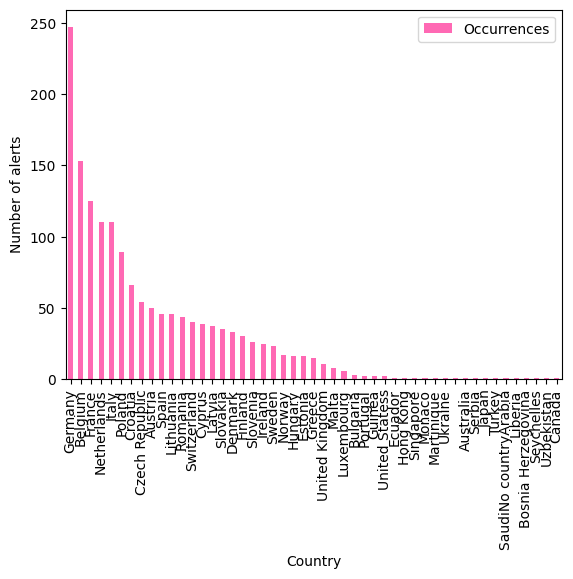

In [19]:
ax = table.plot.bar(x='Country', y='Occurrences', color='hotpink')
plt.xlabel('Country')
plt.ylabel('Number of alerts')

In [20]:
count = Counter(relacionados)
table = pd.DataFrame(list(count.items()), columns=['Country', 'Occurrences'])
table[2] = table['Occurrences']/2997*100
table = table.sort_values(by=['Occurrences'], ascending = False)
table = table[table['Country'] != 'Commission Services']
table = table[table['Country'] != 'INFOSAN']
table['Country'] = table['Country'].str.replace(' ','No country')
table['Country'] = table['Country'].str.replace('UnitedNo countryKingdom','United Kingdom')
table['Country'] = table['Country'].str.replace('CzechNo countryRepublic','Czech Republic')
table['Country'] = table['Country'].str.replace('HongNo countryKong','Hong Kong')
table['Country'] = table['Country'].str.replace('UnitedNo countryState','United States')
table['Country'] = table['Country'].str.replace('EuropeanNo countryCommission','European Commission')
table = table.iloc[:60]
table

,Country,Occurrences,2
0,Germany,235,7.841175
1,Belgium,166,5.538872
2,France,131,4.371038
3,Italy,124,4.137471
6,Netherlands,124,4.137471
18,Poland,120,4.004004
11,Croatia,72,2.402402
8,Austria,49,1.634968
5,Czech Republic,48,1.601602
19,Lithuania,44,1.468135


In [21]:
variance = table['Occurrences'].diff()/2997*100
print(variance.to_string(index=False))

      NaN
-2.302302
-1.167835
-0.233567
 0.000000
-0.133467
-1.601602
-0.767434
-0.033367
-0.133467
-0.033367
-0.133467
 0.000000
-0.066733
-0.100100
-0.066733
-0.133467
-0.033367
 0.000000
-0.066733
-0.166834
-0.133467
 0.000000
-0.066733
-0.033367
-0.200200
 0.000000
-0.133467
-0.033367
-0.033367


Text(0, 0.5, 'Number of alerts')

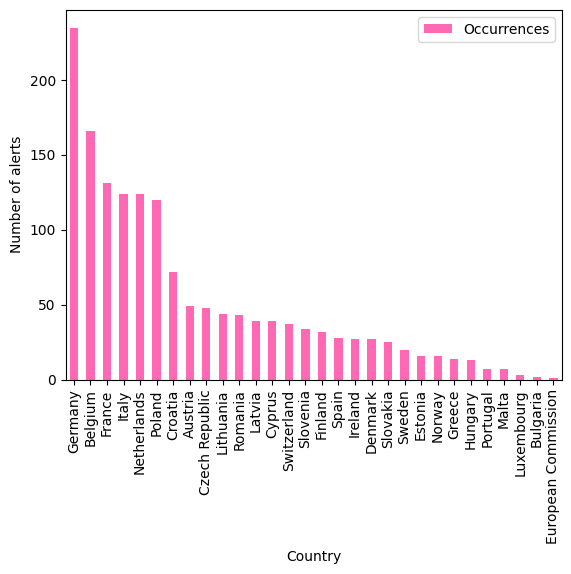

In [23]:
ax = table.plot.bar(x='Country', y='Occurrences', color='hotpink')
plt.xlabel('Country')
plt.ylabel('Number of alerts')

In [24]:
count = Counter(notificantes)
table = pd.DataFrame(list(count.items()), columns=['Country', 'Occurrences'])
table[2] = table['Occurrences']/2997*100
table = table.sort_values(by=['Occurrences'], ascending = False)
table = table[table['Country'] != 'Commission Services']
table = table[table['Country'] != 'INFOSAN']
table = table.iloc[:50]
table

,Country,Occurrences,2
0,Germany,235,7.841175
1,Belgium,166,5.538872
2,France,131,4.371038
3,Italy,124,4.137471
6,Netherlands,124,4.137471
18,Poland,120,4.004004
11,Croatia,72,2.402402
8,Austria,49,1.634968
5,Czech Republic,48,1.601602
19,Lithuania,44,1.468135


In [25]:
variance = table['Occurrences'].diff()/2997*100
print(variance.to_string(index=False))

      NaN
-2.302302
-1.167835
-0.233567
 0.000000
-0.133467
-1.601602
-0.767434
-0.033367
-0.133467
-0.033367
-0.133467
 0.000000
-0.066733
-0.100100
-0.066733
-0.133467
 0.000000
-0.033367
-0.066733
-0.200200
-0.100100
 0.000000
-0.066733
-0.033367
-0.200200
 0.000000
-0.133467
-0.033367
-0.033367


Text(0, 0.5, 'Number of alerts')

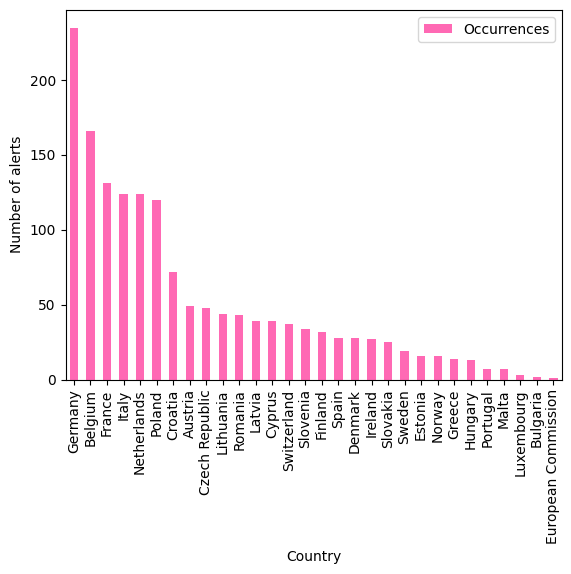

In [26]:
ax = table.plot.bar(x='Country', y='Occurrences', color='hotpink')
plt.xlabel('Country')
plt.ylabel('Number of alerts')

In [27]:
count = Counter(contaminantes)
table = pd.DataFrame(list(count.items()), columns=['Hazards', 'Occurrences'])
table[2] = table['Occurrences']/2997*100
table = table.sort_values(by=['Occurrences'], ascending = False)
table

,Hazards,Occurrences,2
4,Pathogenic micro-organisms,577,19.252586
0,Pesticide residues,406,13.546880
1,Heavy metals,95,3.169837
5,Mycotoxins,71,2.369036
13,Migration,59,1.968635
9,Composition,55,1.835169
3,Food additives and flavourings,41,1.368035
2,Allergens,34,1.134468
10,Non-pathogenic micro-organisms,32,1.067734
17,Biological contaminants,27,0.900901


Text(0, 0.5, 'Instances')

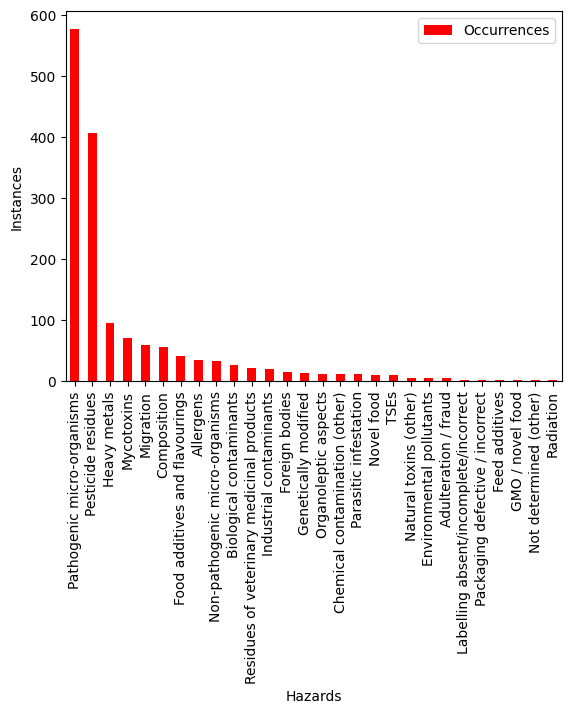

In [29]:
ax = table.plot.bar(x='Hazards', y='Occurrences', color='red')

plt.ylabel('Instances')

In [31]:
count = Counter(productos)
table = pd.DataFrame(list(count.items()), columns=['Products', 'Occurrences'])
table[2] = table['Occurrences']/2997*100
table = table.sort_values(by=['Occurrences'], ascending = False)
table = table[table['Products'] != "nuts"]
table = table[table['Products'] != "dietetic foods"]
table = table[table['Products'] != "food supplements"]
table.drop(11, inplace=True)
table

,Products,Occurrences,2
1,fruits and vegetables,378,12.612613
3,poultry meat and poultry meat products,209,6.973640
5,feed materials,149,4.971638
0,herbs and spices,103,3.436770
2,cereals and bakery products,99,3.303303
4,meat and meat products (other than poultry),99,3.303303
15,fish and fish products,98,3.269937
6,other food product / mixed,45,1.501502
7,bivalve molluscs and products thereof,45,1.501502
9,milk and milk products,39,1.301301


Text(0, 0.5, 'Instances')

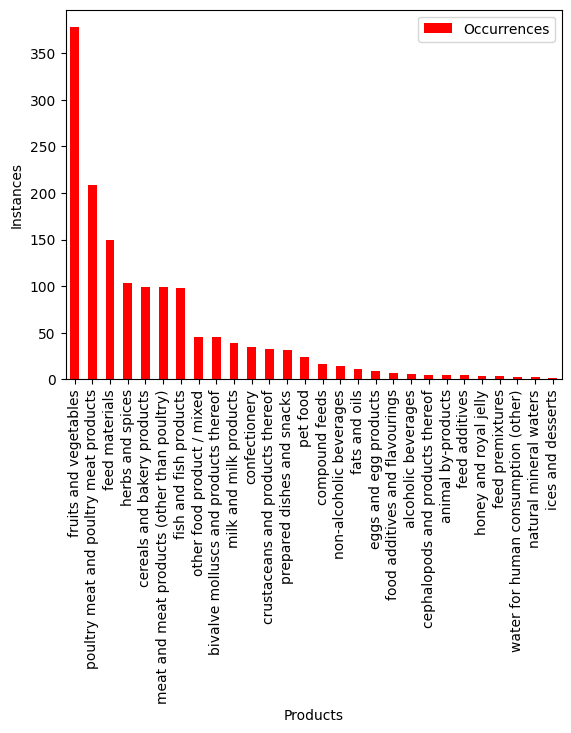

In [32]:
ax = table.plot.bar(x='Products', y='Occurrences', color='red')

plt.ylabel('Instances')

In [20]:
bubble_df = data[['NOT_COUNTRY','ORIG_COUNTRY']]

In [21]:
dic_conti = {}
contaminantes = []
productos = []

for index, row in bubble_df.iterrows():
    # Ensure that the values are strings or replace NaNs with an empty string
    contaminante = str(row['ORIG_COUNTRY']) if pd.notna(row['ORIG_COUNTRY']) else ''
    producto = str(row['NOT_COUNTRY']) if pd.notna(row['NOT_COUNTRY']) else ''
    
    # Split the strings only if they are not empty
    contaminante = contaminante.split(",") if contaminante else []
    producto = producto.split(",") if producto else []
    
    for cont in contaminante:
        contaminantes.append(cont)
        for prod in producto:
            key = cont + '&' + prod
            if key in dic_conti:
                dic_conti[key] += 1
            else:
                dic_conti[key] = 1
    
    for prod in producto:
        productos.append(prod)


In [22]:
count = Counter(contaminantes)
contaminantes_table = pd.DataFrame(list(count.items()))
contaminantes_table = contaminantes_table.sort_values(by=[1], ascending = False)
contaminantes_table

,0,1
6,Poland,150
10,Turkey,126
8,Netherlands,104
18,China,90
20,France,88
...,...,...
77,Kosovo,1
74,Togo,1
46,Oman,1
52,West Bank and Gaza Strip,1


In [23]:
selected_contaminants = []
for index, rows in contaminantes_table.iterrows(): 
    selected_contaminants.append(rows[0])
selected_contaminants[:5] 

['Poland', 'Turkey', 'Netherlands', 'China', 'France']

In [24]:
count = Counter(productos)
hazards_table = pd.DataFrame(list(count.items()))
hazards_table = hazards_table.sort_values(by=[1], ascending = False)
hazards_table

,0,1
0,Germany,235
1,Belgium,166
2,France,131
3,Italy,124
6,Netherlands,124
18,Poland,120
11,Croatia,72
8,Austria,49
5,Czech Republic,48
19,Lithuania,44


In [25]:
selected_hazards=[]
for index, rows in hazards_table.iterrows(): 
    selected_hazards.append(rows[0])
selected_hazards[:5]

['Germany', 'Belgium', 'France', 'Italy', 'Netherlands']

In [26]:
sorted_dict = sorted(dic_conti.items(), key=lambda kv: kv[1],reverse = True)

In [27]:
cont_table = pd.DataFrame.from_dict(sorted_dict)

In [28]:
cont_table10 = cont_table[:17]
cont_table10

,0,1
0,Netherlands&Netherlands,47
1,Poland&Poland,38
2,Ukraine&Poland,37
3,France&France,34
4,Turkey&Germany,30
5,Belgium&Belgium,26
6,Netherlands&Belgium,25
7,France&Belgium,25
8,Brazil&Germany,24
9,Spain&Italy,24


In [29]:
contaminante = []
product = []
for index, row in cont_table10.iterrows():
    comb=row[0].split("&")
    contaminante.append(comb[0])
    product.append(comb[1])
cont_table10[2] = contaminante
cont_table10[3] = product

C:\Users\shiny\AppData\Local\Temp\ipykernel_18940\3577873739.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cont_table10[2] = contaminante
C:\Users\shiny\AppData\Local\Temp\ipykernel_18940\3577873739.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cont_table10[3] = product


In [30]:
cont_table10.columns = ['comb', 'value','hazard','product']
cont_table10

,comb,value,hazard,product
0,Netherlands&Netherlands,47,Netherlands,Netherlands
1,Poland&Poland,38,Poland,Poland
2,Ukraine&Poland,37,Ukraine,Poland
3,France&France,34,France,France
4,Turkey&Germany,30,Turkey,Germany
5,Belgium&Belgium,26,Belgium,Belgium
6,Netherlands&Belgium,25,Netherlands,Belgium
7,France&Belgium,25,France,Belgium
8,Brazil&Germany,24,Brazil,Germany
9,Spain&Italy,24,Spain,Italy


In [31]:
data_crosstab = pd.crosstab(cont_table10['hazard'], 
                            cont_table10['product'],  
                               margins = False) 
data_crosstab

product,Belgium,France,Germany,Italy,Latvia,Lithuania,Netherlands,Poland,Romania
hazard,,,,,,,,,
Belgium,1,0,0,0,0,0,0,0,0
Brazil,0,0,1,0,0,0,0,0,0
China,0,0,0,1,0,0,0,0,0
France,1,1,0,0,0,0,0,0,0
Germany,0,0,1,0,0,0,0,0,0
Netherlands,1,0,1,0,0,0,1,0,0
Poland,0,0,0,0,1,1,0,1,0
Spain,0,1,0,1,0,0,0,0,0
Turkey,0,0,1,0,0,0,0,0,1


In [32]:
products = list(data_crosstab.columns.values)
hazards = data_crosstab.index.values.tolist()
for p in products:
    for h in hazards:
        if data_crosstab[p][h] == 1:
            key = h+'&'+p
            value = cont_table10.loc[cont_table10['comb'] == key, 'value'] 
            data_crosstab[p][h] = value

In [33]:
data_crosstab

product,Belgium,France,Germany,Italy,Latvia,Lithuania,Netherlands,Poland,Romania
hazard,,,,,,,,,
Belgium,26,0,0,0,0,0,0,0,0
Brazil,0,0,24,0,0,0,0,0,0
China,0,0,0,19,0,0,0,0,0
France,25,34,0,0,0,0,0,0,0
Germany,0,0,21,0,0,0,0,0,0
Netherlands,25,0,16,0,0,0,47,0,0
Poland,0,0,0,0,22,18,0,38,0
Spain,0,18,0,24,0,0,0,0,0
Turkey,0,0,30,0,0,0,0,0,23


x size: 90, y size: 90


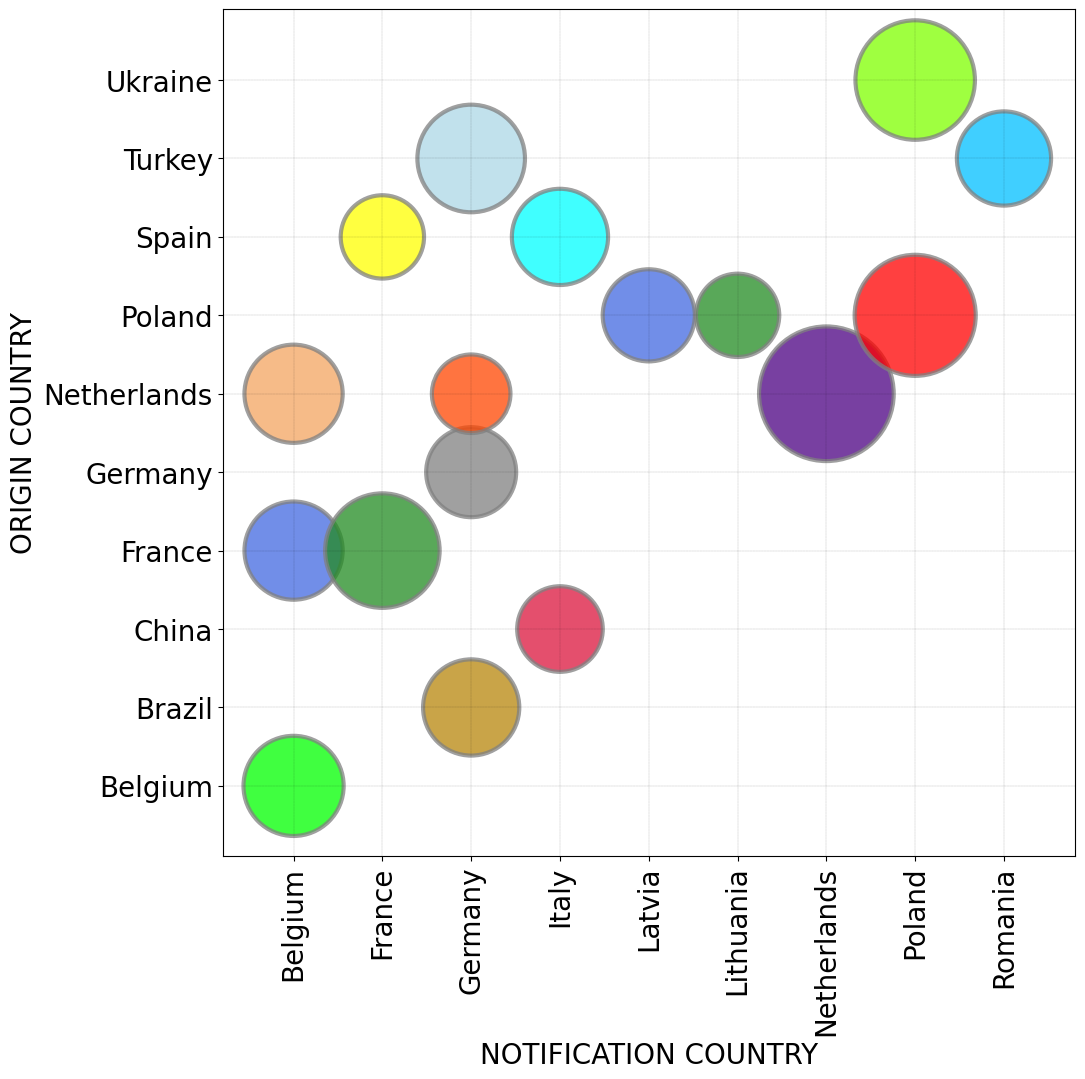

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming data_crosstab is defined and ready
x, y = np.meshgrid(data_crosstab.columns, data_crosstab.index)
num_points = x.flatten().size
print(f"x size: {x.flatten().size}, y size: {y.flatten().size}")

# Define a unique color for each point (manual input or generated)
C = np.array([
    [0, 255, 0],    # Green
    [0, 0, 255],    # Blue
    [255, 255, 0],  # Yellow
    [255, 0, 255],  # Magenta
    [0, 255, 255],  # Cyan
    [128, 0, 128],  # Purple
    [255, 165, 0],  # Orange
    [128, 128, 128], # Grey
    [0, 128, 128],  # Teal
    [72, 61, 139],  # Dark Slate Blue
    [70, 130, 180], # Steel Blue
    [184, 134, 11], # Dark Goldenrod
    [173, 216, 230], # Light Blue
    [152, 251, 152], # Pale Green
    [244, 164, 96], # Sandy Brown
    [238, 130, 238], # Violet
    [255, 69, 0],   # Orange Red
    [144, 238, 144], # Light Green
    [0, 191, 255],  # Deep Sky Blue
    [255, 105, 180], # Hot Pink
    [75, 0, 130],   # Indigo
    [220, 20, 60],  # Crimson
    [255, 20, 147], # Deep Pink
    [255, 218, 185], # Peach Puff
    [0, 255, 127],  # Spring Green
    [139, 69, 19],  # Saddle Brown
    [127, 255, 0],  # Chartreuse
    [65, 105, 225], # Royal Blue
    [34, 139, 34],  # Forest Green
    [210, 105, 30], # Chocolate
    [255, 0, 0],    # Red
    
    
    
    
    # Continue adding colors until it matches the number of points
])

# Ensure C has the same number of elements as x and y
C = np.resize(C, (num_points, 3))  # Repeat or truncate to match the number of points

# Plot the scatter plot with unique colors
plot_tab = data_crosstab * 200  # Scale the bubble sizes

# Set font size for better readability
plt.rcParams.update({'font.size': 20})

# Create a larger figure for better visibility
fig = plt.figure(figsize=[11, 11])

# Scatter plot with unique colors for each point
plt.scatter(x=x.flatten(), y=y.flatten(), s=plot_tab.values.flatten(),c=C/255.0,alpha=0.75,edgecolors="grey",linewidth=3)
# Add a grid for clarity
plt.grid(ls="--", zorder=1, linewidth=0.1, color='k')

# Adjust margins for better spacing
plt.margins(0.1)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set axis labels
plt.xlabel("NOTIFICATION COUNTRY")
plt.ylabel("ORIGIN COUNTRY")

# Display the plot
plt.show()

In [89]:
bubble_df = data[['PROD_CAT','HAZARDS_CAT']]

In [90]:
dic_conti = {}
contaminantes = []
productos = []

for index, row in bubble_df.iterrows():
    # Ensure that the values are strings or replace NaNs with an empty string
    contaminante = str(row['HAZARDS_CAT']) if pd.notna(row['HAZARDS_CAT']) else ''
    producto = str(row['PROD_CAT']) if pd.notna(row['PROD_CAT']) else ''
    
    # Split the strings only if they are not empty
    contaminante = contaminante.split(",") if contaminante else []
    producto = producto.split(",") if producto else []
    
    for cont in contaminante:
        contaminantes.append(cont)
        for prod in producto:
            key = cont + '&' + prod
            if key in dic_conti:
                dic_conti[key] += 1
            else:
                dic_conti[key] = 1
    
    for prod in producto:
        productos.append(prod)

In [91]:
count = Counter(contaminantes)
contaminantes_table = pd.DataFrame(list(count.items()))
contaminantes_table = contaminantes_table.sort_values(by=[1], ascending = False)
contaminantes_table

,0,1
4,Pathogenic micro-organisms,577
0,Pesticide residues,406
1,Heavy metals,95
5,Mycotoxins,71
13,Migration,59
9,Composition,55
3,Food additives and flavourings,41
2,Allergens,34
10,Non-pathogenic micro-organisms,32
17,Biological contaminants,27


In [92]:
selected_contaminants = []
for index, rows in contaminantes_table.iterrows(): 
    selected_contaminants.append(rows[0])
selected_contaminants[:5] 

['Pathogenic micro-organisms',
 'Pesticide residues',
 'Heavy metals',
 'Mycotoxins',
 'Migration']

In [93]:
count = Counter(productos)
hazards_table = pd.DataFrame(list(count.items()))
hazards_table = hazards_table.sort_values(by=[1], ascending = False)
hazards_table

,0,1
1,fruits and vegetables,378
3,poultry meat and poultry meat products,209
5,feed materials,149
0,herbs and spices,103
2,cereals and bakery products,99
4,meat and meat products (other than poultry),99
15,fish and fish products,98
11,food contact materials,70
6,other food product / mixed,45
7,bivalve molluscs and products thereof,45


In [94]:
selected_hazards=[]
for index, rows in hazards_table.iterrows(): 
    selected_hazards.append(rows[0])
selected_hazards[:5]

['fruits and vegetables',
 'poultry meat and poultry meat products',
 'feed materials',
 'herbs and spices',
 'cereals and bakery products']

In [95]:
sorted_dict = sorted(dic_conti.items(), key=lambda kv: kv[1],reverse = True)

In [96]:
cont_table = pd.DataFrame.from_dict(sorted_dict)

In [97]:
cont_table10 = cont_table[:17]
cont_table10

,0,1
0,Pesticide residues&fruits and vegetables,277
1,Pathogenic micro-organisms&poultry meat and po...,201
2,Pathogenic micro-organisms&feed materials,79
3,Pathogenic micro-organisms&meat and meat produ...,68
4,Migration&food contact materials,57
5,Pesticide residues&herbs and spices,43
6,Pathogenic micro-organisms&bivalve molluscs an...,41
7,Pesticide residues&cereals and bakery products,38
8,Pathogenic micro-organisms&milk and milk products,35
9,Pathogenic micro-organisms&herbs and spices,34


In [98]:
contaminante = []
product = []
for index, row in cont_table10.iterrows():
    comb=row[0].split("&")
    contaminante.append(comb[0])
    product.append(comb[1])
cont_table10[2] = contaminante
cont_table10[3] = product

C:\Users\shiny\AppData\Local\Temp\ipykernel_18940\3577873739.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cont_table10[2] = contaminante
C:\Users\shiny\AppData\Local\Temp\ipykernel_18940\3577873739.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cont_table10[3] = product


In [99]:
cont_table10.columns = ['comb', 'value','hazard','product']
cont_table10

,comb,value,hazard,product
0,Pesticide residues&fruits and vegetables,277,Pesticide residues,fruits and vegetables
1,Pathogenic micro-organisms&poultry meat and po...,201,Pathogenic micro-organisms,poultry meat and poultry meat products
2,Pathogenic micro-organisms&feed materials,79,Pathogenic micro-organisms,feed materials
3,Pathogenic micro-organisms&meat and meat produ...,68,Pathogenic micro-organisms,meat and meat products (other than poultry)
4,Migration&food contact materials,57,Migration,food contact materials
5,Pesticide residues&herbs and spices,43,Pesticide residues,herbs and spices
6,Pathogenic micro-organisms&bivalve molluscs an...,41,Pathogenic micro-organisms,bivalve molluscs and products thereof
7,Pesticide residues&cereals and bakery products,38,Pesticide residues,cereals and bakery products
8,Pathogenic micro-organisms&milk and milk products,35,Pathogenic micro-organisms,milk and milk products
9,Pathogenic micro-organisms&herbs and spices,34,Pathogenic micro-organisms,herbs and spices


In [100]:
data_crosstab = pd.crosstab(cont_table10['product'], 
                            cont_table10['hazard'],  
                               margins = False) 
data_crosstab

hazard,Biological contaminants,Heavy metals,Migration,Mycotoxins,Non-pathogenic micro-organisms,Pathogenic micro-organisms,Pesticide residues
product,,,,,,,
bivalve molluscs and products thereof,0,0,0,0,0,1,0
cereals and bakery products,0,0,0,1,0,0,1
feed materials,0,0,0,0,1,1,0
fish and fish products,1,1,0,0,0,1,0
food contact materials,0,0,1,0,0,0,0
fruits and vegetables,0,1,0,1,0,0,1
herbs and spices,0,0,0,0,0,1,1
meat and meat products (other than poultry),0,0,0,0,0,1,0
milk and milk products,0,0,0,0,0,1,0


In [86]:
data_crosstab

hazard,Biological contaminants,Heavy metals,Migration,Mycotoxins,Non-pathogenic micro-organisms,Pathogenic micro-organisms,Pesticide residues
product,,,,,,,
bivalve molluscs and products thereof,0,0,0,0,0,1,0
cereals and bakery products,0,0,0,1,0,0,1
feed materials,0,0,0,0,1,1,0
fish and fish products,1,1,0,0,0,1,0
food contact materials,0,0,1,0,0,0,0
fruits and vegetables,0,1,0,1,0,0,1
herbs and spices,0,0,0,0,0,1,1
meat and meat products (other than poultry),0,0,0,0,0,1,0
milk and milk products,0,0,0,0,0,1,0


x size: 70, y size: 70


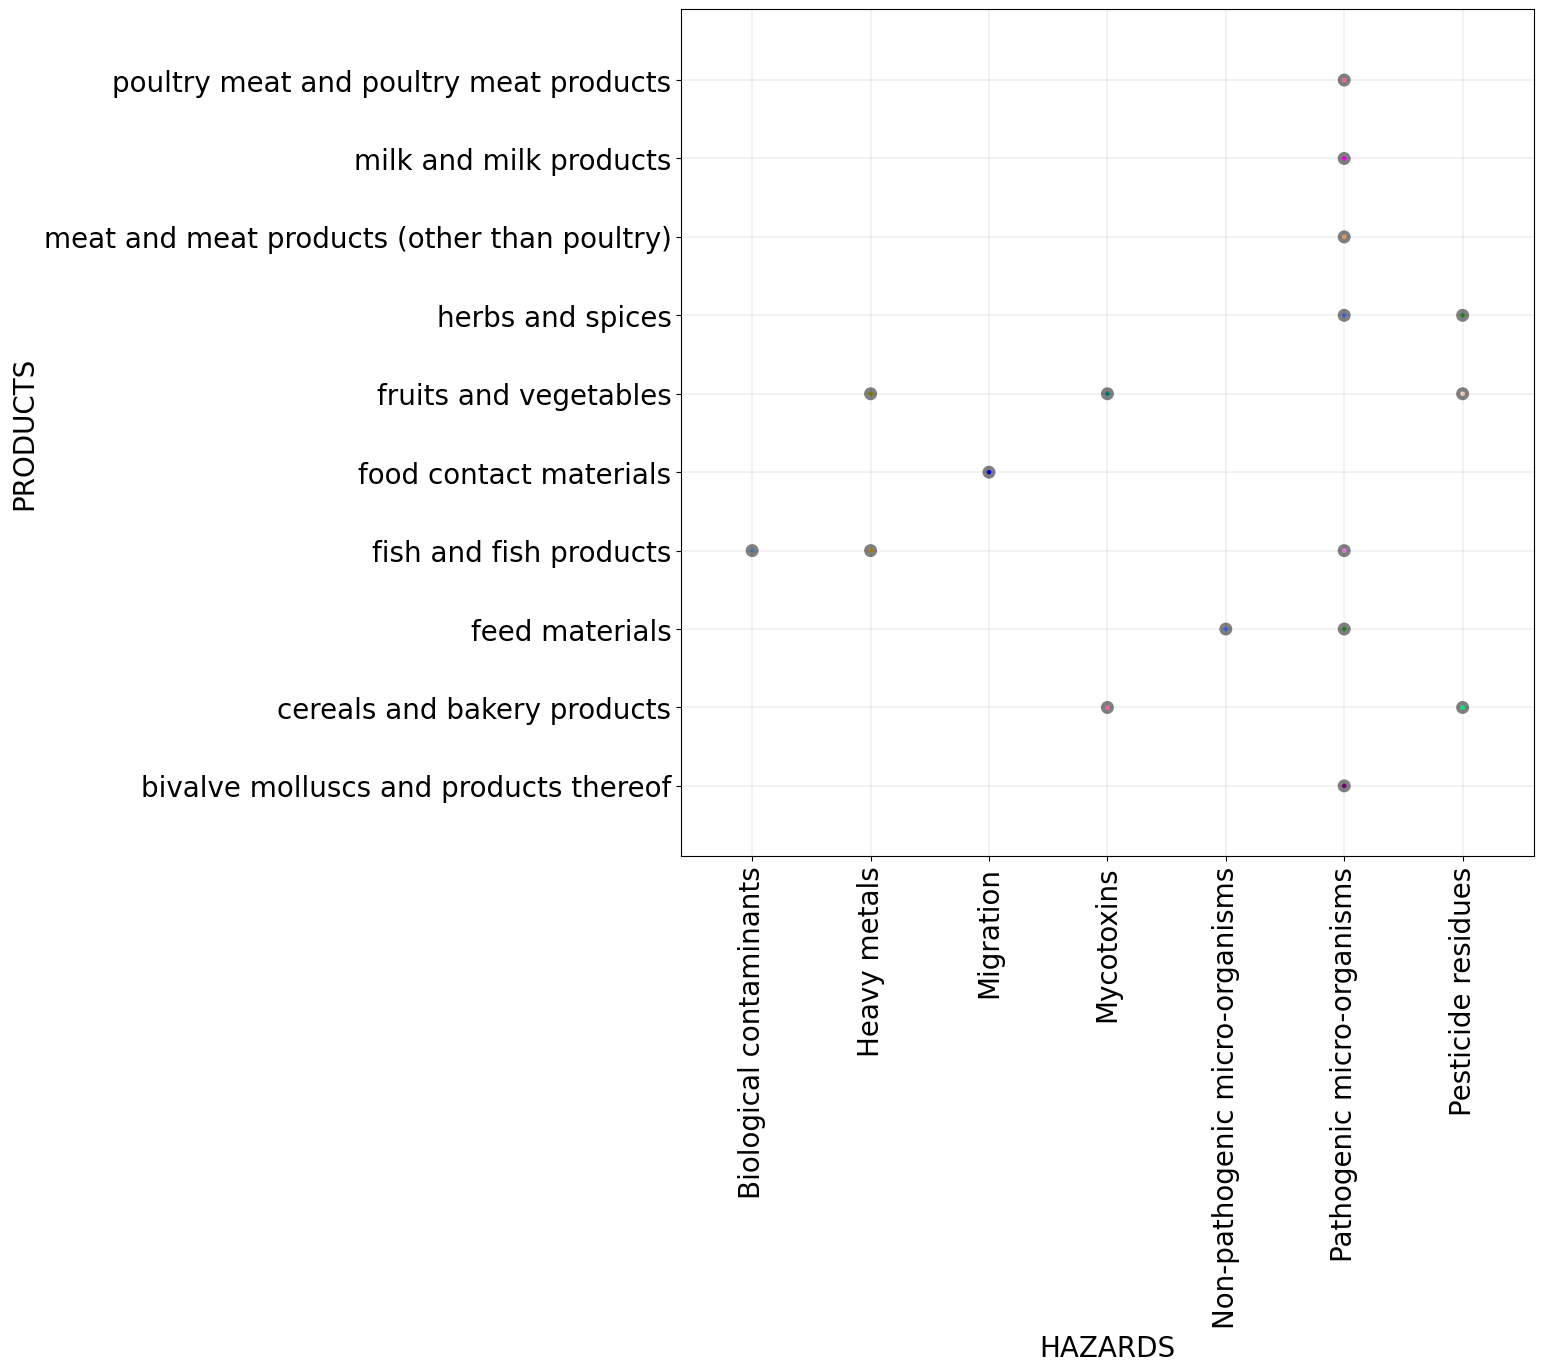

In [87]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming data_crosstab is defined and ready
x, y = np.meshgrid(data_crosstab.columns, data_crosstab.index)
num_points = x.flatten().size
print(f"x size: {x.flatten().size}, y size: {y.flatten().size}")

# Define a unique color for each point (manual input or generated)
C = np.array([
      
    [255, 0, 0],    # Red
    [0, 255, 0],    # Green
    [0, 0, 255],    # Blue
    [255, 255, 0],  # Yellow
    [255, 0, 255],  # Magenta
    [0, 255, 255],  # Cyan
    [128, 0, 128],  # Purple
    [255, 165, 0],  # Orange
    [128, 128, 0],  # Olive
    [128, 128, 128], # Grey
    [0, 128, 128],  # Teal
    [255, 105, 180], # Hot Pink
    [75, 0, 130],   # Indigo
    [255, 218, 185], # Peach Puff
    [0, 255, 127],  # Spring Green
    [139, 69, 19],  # Saddle Brown
    [127, 255, 0],  # Chartreuse
    [220, 20, 60],  # Crimson
    [255, 20, 147], # Deep Pink
    [65, 105, 225], # Royal Blue
    [34, 139, 34],  # Forest Green
    [210, 105, 30], # Chocolate
    [72, 61, 139],  # Dark Slate Blue
    [70, 130, 180], # Steel Blue
    [184, 134, 11], # Dark Goldenrod
    [173, 216, 230], # Light Blue
    [152, 251, 152], # Pale Green
    [244, 164, 96], # Sandy Brown
    [238, 130, 238], # Violet
    [255, 69, 0],   # Orange Red
    #[144, 238, 144], # Light Green
    [0, 191, 255],  # Deep Sky Blue
    # Continue adding colors until it matches the number of points
])

# Ensure C has the same number of elements as x and y
C = np.resize(C, (num_points, 3))  # Repeat or truncate to match the number of points

# Plot the scatter plot with unique colors
plot_tab = data_crosstab * 40  # Scale the bubble sizes

# Set font size for better readability
plt.rcParams.update({'font.size': 20})

# Create a larger figure for better visibility
fig = plt.figure(figsize=[11, 11])

# Scatter plot with unique colors for each point
plt.scatter(x=x.flatten(), y=y.flatten(), s=plot_tab.values.flatten(), 
            c=C/255.0, alpha=1, edgecolors="grey", linewidth=3)

# Add a grid for clarity
plt.grid(ls="--", zorder=1, linewidth=0.1, color='k')

# Adjust margins for better spacing
plt.margins(0.1)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set axis labels
plt.xlabel("HAZARDS")
plt.ylabel("PRODUCTS")

# Display the plot
plt.show()

x size: 90, y size: 90, C size: 270


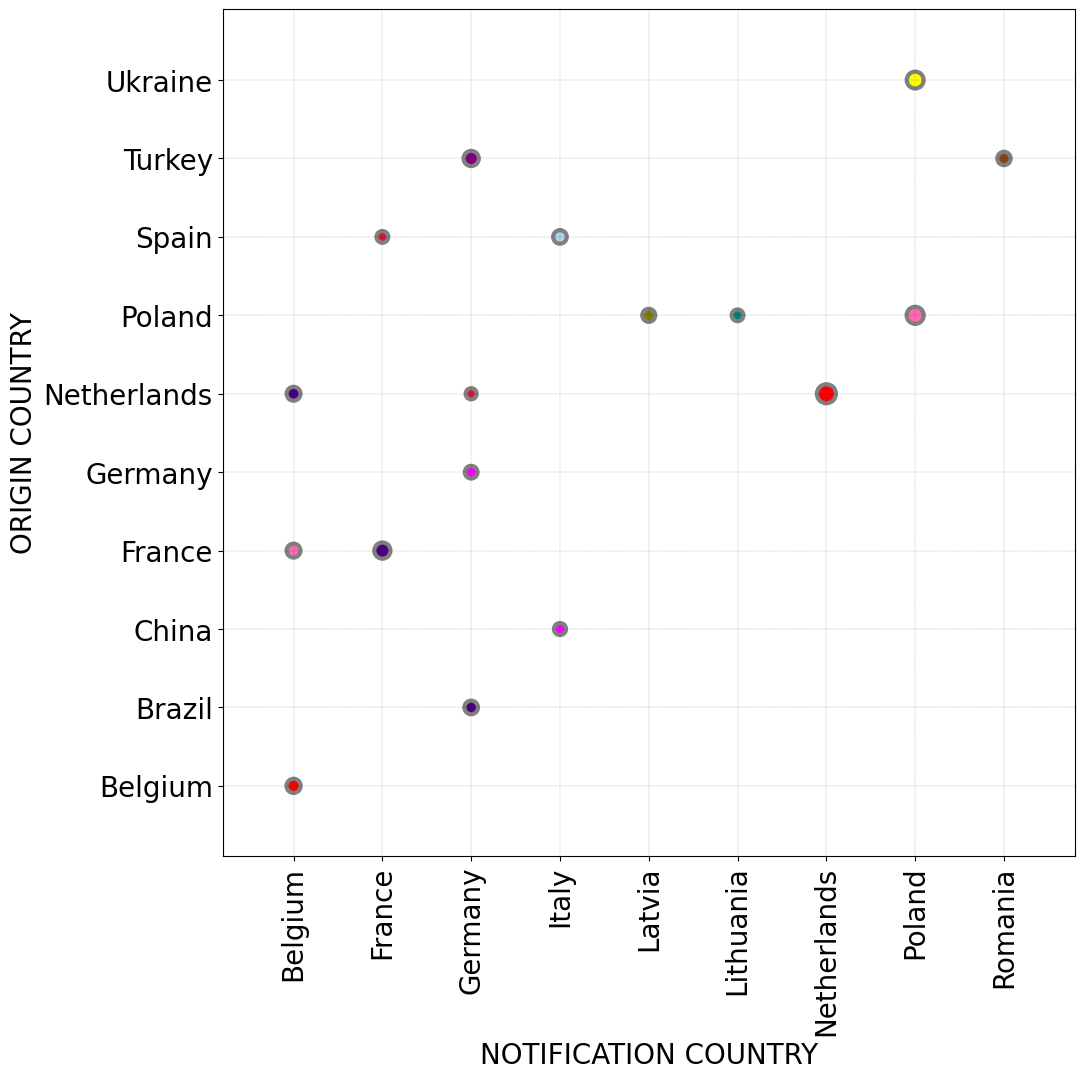

In [109]:
# Check the size of x, y, and C
print(f"x size: {x.flatten().size}, y size: {y.flatten().size}, C size: {C.size}")

# Ensure C has the same number of elements as x and y
C = C[:x.size]  # Truncate or adjust C to match the size of x and y
x,y = np.meshgrid(data_crosstab.columns, data_crosstab.index)
# Plot the scatter plot with adjusted C
plot_tab = data_crosstab*4
plt.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=[11,11])
plt.scatter(x=x.flatten(), y=y.flatten(), s=plot_tab.values.flatten(), c=C/255.0, alpha=1, edgecolors="grey", linewidth=3)
plt.grid(ls="--", zorder=1, linewidth=0.1, color='k')
plt.margins(.1)
plt.xticks(rotation=90)
plt.xlabel("NOTIFICATION COUNTRY")
plt.ylabel("ORIGIN COUNTRY")
plt.show()

x size: 90, y size: 90, C size: 270


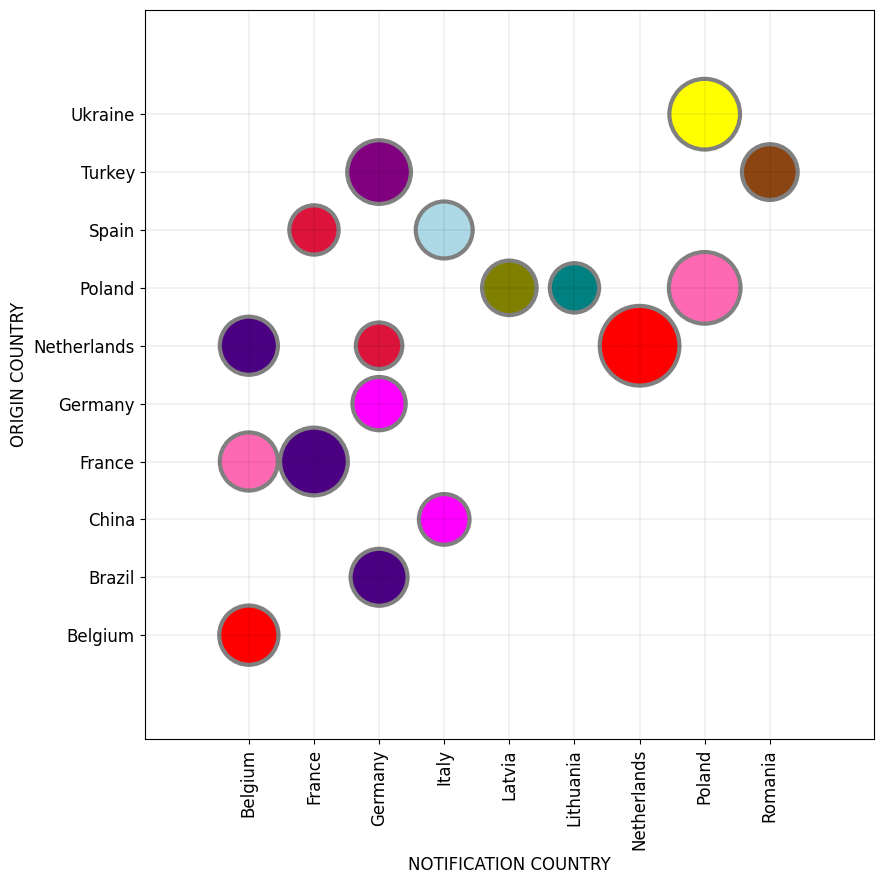

In [111]:
# Assuming the necessary libraries (matplotlib, numpy, etc.) and data are already imported

# Check the size of x, y, and C
print(f"x size: {x.flatten().size}, y size: {y.flatten().size}, C size: {C.size}")

# Ensure C has the same number of elements as x and y
C = C[:x.size]  # Adjust C to match the size of x and y
x, y = np.meshgrid(data_crosstab.columns, data_crosstab.index)

# Scale the values for the plot, multiplying for larger marker sizes
plot_tab = data_crosstab * 70  # Increase size scaling for larger markers

# Update font size for readability
plt.rcParams.update({'font.size': 12})

# Increase figure size for better visibility (change figsize as needed)
fig = plt.figure(figsize=[9, 9])  # Increased from 11x11 to 16x16 for a bigger plot

# Scatter plot with adjusted marker sizes and colors
plt.scatter(x=x.flatten(), y=y.flatten(), s=plot_tab.values.flatten(), 
            c=C/255.0, alpha=1, edgecolors="grey", linewidth=3)

# Add a grid with lighter and thinner lines
plt.grid(ls="--", zorder=1, linewidth=0.1, color='k')

# Add margins to give some spacing between axis and points
plt.margins(0.2)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Increase font size for the axis labels
plt.xlabel("NOTIFICATION COUNTRY", fontsize=12)
plt.ylabel("ORIGIN COUNTRY", fontsize=12)

# Display the plot with a tighter layout
plt.tight_layout()
plt.show()
